In [ ]:
## if you are on Colab, install pyballmapper
# !pip install pyballmapper

In [2]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

## Download data

In [9]:
try:
    lucky = pd.read_csv("data/lucky_cat.csv", header=None).to_numpy(dtype=float)
except:
    print("reading data from github")
    lucky = pd.read_csv(
        "https://raw.githubusercontent.com/dioscuri-tda/pyBallMapper/refs/heads/main/notebooks/data/lucky_cat.csv",
        header=None,
    ).to_numpy(dtype=float)

print(lucky.shape)

reading data from github
(72, 16384)


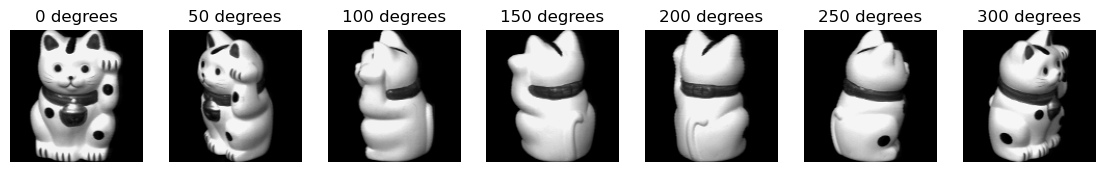

In [10]:
fig, axs = plt.subplots(ncols=7, figsize=(14, 5))

for i in range(7):
    axs[i].imshow(lucky[i * 10].reshape((128, 128)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("{:.0f} degrees".format(i * 10 / 72 * 360))

# BallMapper

In [5]:
from pyballmapper import BallMapper

In [6]:
bm = BallMapper(X=lucky, eps=5000, verbose="tqdm")

Finding vertices...


  0%|          | 0/72 [00:00<?, ?it/s]

24 vertices found.
Computing points_covered_by_landmarks...


  0%|          | 0/24 [00:00<?, ?it/s]

Running BallMapper 
Finding edges...


0it [00:00, ?it/s]

Creating Ball Mapper graph...
Done


<Axes: >

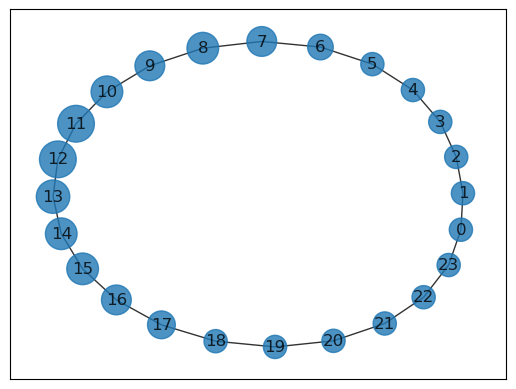

In [7]:
bm.draw_networkx(pos=nx.spring_layout(bm.Graph, seed=66, iterations=100))

## Color by angle

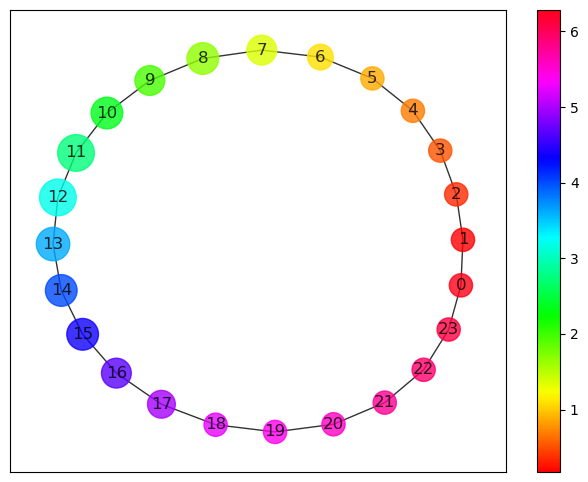

In [8]:
from scipy.stats import circmean
from matplotlib import colormaps as cm

# we use the angles as coloring functions, with circmean instead of artmetic mean
bm.add_coloring(
    coloring_df=pd.DataFrame(
        data={"angle": np.linspace(0, 2 * np.pi, num=72, endpoint=False)}
    ),
    custom_function=circmean,
)

# we can color the graph by any column in coloring_df
# here we adopt a standard colour palette
my_palette = cm.get_cmap("hsv")

fig, ax = plt.subplots(figsize=(8, 6))
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networkx(
    coloring_variable="angle",
    color_palette=my_palette,
    colorbar=True,
    pos=nx.spring_layout(bm.Graph, seed=66, iterations=100),
)
plt.show()